In [1]:
import pandas as pd
import numpy as np
import pickle
from pprint import pprint
import matplotlib.pyplot as plt
from gensim.corpora import Dictionary, MmCorpus
from gensim.models import LdaModel
from gensim.test.utils import datapath
import logging
logging.basicConfig(format="%(asctime)s : %(levelname)s : %(message)s", level=logging.INFO)

/usr/local/lib/python3.9/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


The following scripts are from https://github.com/laurejt/authorless-tms

Obtain topic-genre correlation:

`! python3 estimated_topic_author_correlation.py gensim --input data/genre_reviews.tsv --lda-model /usr/local/lib/python3.9/site-packages/gensim/test/test_data/lda_20 --output genre_topic_cor.tsv -v`

(High entropy means topic is evenly spread among genres, low entropy means topic is concentrated in a particular genre)

Downsample corpus:

`! python3 downsample_corpus.py --input data/genre_reviews.tsv --vocab data/vocab.tsv --output data/down_genre_reviews.tsv --min-doc-length 10 -v`

Run LDA with downsampled corpus:

In [2]:
# load data
dictionary = Dictionary.load("data/dictionary.pkl")
downsamp_out = pd.read_csv("data/down_genre_reviews.tsv", sep="\t", names=["doc_id","genre","tokens"])
train_reviews = downsamp_out["tokens"].apply(lambda tok: tok.split()).tolist()
train_corpus = [dictionary.doc2bow(rev) for rev in train_reviews]
test_corpus = MmCorpus("data/test_corpus.mm")

2021-05-28 13:17:32,061 : INFO : loading Dictionary object from data/dictionary.pkl
2021-05-28 13:17:32,071 : INFO : Dictionary lifecycle event {'fname': 'data/dictionary.pkl', 'datetime': '2021-05-28T13:17:32.071352', 'gensim': '4.0.1', 'python': '3.9.5 (default, May  4 2021, 03:36:27) \n[Clang 12.0.0 (clang-1200.0.32.29)]', 'platform': 'macOS-11.4-x86_64-i386-64bit', 'event': 'loaded'}
2021-05-28 13:17:36,806 : INFO : loaded corpus index from data/test_corpus.mm.index
2021-05-28 13:17:36,807 : INFO : initializing cython corpus reader from data/test_corpus.mm
2021-05-28 13:17:36,808 : INFO : accepted corpus with 1665 documents, 17974 features, 103674 non-zero entries


2021-05-28 13:17:36,819 : INFO : using autotuned alpha, starting with [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
2021-05-28 13:17:36,820 : INFO : using symmetric eta at 0.1
2021-05-28 13:17:36,823 : INFO : using serial LDA version on this node
2021-05-28 13:17:36,840 : INFO : running online (single-pass) LDA training, 10 topics, 1 passes over the supplied corpus of 82443 documents, updating model once every 5000 documents, evaluating perplexity every 50000 documents, iterating 50x with a convergence threshold of 0.001000
2021-05-28 13:17:36,840 : INFO : PROGRESS: pass 0, at document #5000/82443


Trying 10 Topics


2021-05-28 13:17:39,519 : INFO : optimized alpha [0.103635855, 0.09045409, 0.104858555, 0.12540767, 0.092077576, 0.098803096, 0.09752144, 0.106745586, 0.10071708, 0.10803241]
2021-05-28 13:17:39,525 : INFO : merging changes from 5000 documents into a model of 82443 documents
2021-05-28 13:17:39,532 : INFO : topic #1 (0.090): 0.007*"really" + 0.006*"like" + 0.006*"life" + 0.006*"series" + 0.006*"character" + 0.005*"would" + 0.005*"know" + 0.005*"get" + 0.005*"first" + 0.004*"could"
2021-05-28 13:17:39,534 : INFO : topic #4 (0.092): 0.011*"character" + 0.006*"like" + 0.006*"much" + 0.006*"get" + 0.005*"series" + 0.005*"time" + 0.004*"know" + 0.004*"would" + 0.004*"really" + 0.004*"love"
2021-05-28 13:17:39,535 : INFO : topic #7 (0.107): 0.012*"character" + 0.011*"like" + 0.008*"series" + 0.007*"time" + 0.007*"much" + 0.006*"love" + 0.005*"really" + 0.005*"first" + 0.005*"good" + 0.005*"way"
2021-05-28 13:17:39,536 : INFO : topic #9 (0.108): 0.010*"character" + 0.009*"like" + 0.007*"reall

Held Out Perplexity


2021-05-28 13:18:25,218 : INFO : -10.309 per-word bound, 1268.3 perplexity estimate based on a held-out corpus of 1665 documents with 125726 words
2021-05-28 13:18:25,222 : INFO : using ParallelWordOccurrenceAccumulator(processes=7, batch_size=64) to estimate probabilities from sliding windows


1268.2503404011359
Topic Coherence


2021-05-28 13:18:32,136 : INFO : 168 batches submitted to accumulate stats from 10752 documents (-336764 virtual)
2021-05-28 13:18:32,273 : INFO : 174 batches submitted to accumulate stats from 11136 documents (-345341 virtual)
2021-05-28 13:18:36,758 : INFO : 357 batches submitted to accumulate stats from 22848 documents (-691033 virtual)
2021-05-28 13:18:40,865 : INFO : 545 batches submitted to accumulate stats from 34880 documents (-1067294 virtual)
2021-05-28 13:18:45,169 : INFO : 730 batches submitted to accumulate stats from 46720 documents (-1422884 virtual)
2021-05-28 13:18:46,912 : INFO : 802 batches submitted to accumulate stats from 51328 documents (-1560160 virtual)
2021-05-28 13:18:49,563 : INFO : 921 batches submitted to accumulate stats from 58944 documents (-1808473 virtual)
2021-05-28 13:18:52,948 : INFO : 1070 batches submitted to accumulate stats from 68480 documents (-2094847 virtual)
2021-05-28 13:18:56,792 : INFO : 1243 batches submitted to accumulate stats from 7

Trying 20 Topics


2021-05-28 13:19:01,431 : INFO : optimized alpha [0.050206617, 0.046079002, 0.050768066, 0.05809343, 0.04621355, 0.04933599, 0.04773146, 0.05097514, 0.049443003, 0.051620193, 0.0476282, 0.049082793, 0.055475622, 0.04706973, 0.052266203, 0.05004641, 0.048279855, 0.0510503, 0.04557858, 0.05485521]
2021-05-28 13:19:01,444 : INFO : merging changes from 5000 documents into a model of 82443 documents
2021-05-28 13:19:01,456 : INFO : topic #18 (0.046): 0.008*"like" + 0.006*"really" + 0.006*"life" + 0.006*"love" + 0.005*"think" + 0.005*"time" + 0.004*"way" + 0.004*"end" + 0.004*"would" + 0.004*"good"
2021-05-28 13:19:01,457 : INFO : topic #1 (0.046): 0.008*"really" + 0.006*"character" + 0.006*"life" + 0.006*"like" + 0.005*"year" + 0.005*"get" + 0.005*"time" + 0.005*"would" + 0.004*"people" + 0.004*"could"
2021-05-28 13:19:01,458 : INFO : topic #19 (0.055): 0.009*"like" + 0.007*"would" + 0.007*"character" + 0.006*"get" + 0.006*"first" + 0.005*"life" + 0.005*"series" + 0.005*"thing" + 0.005*"lov

Held Out Perplexity


2021-05-28 13:19:51,071 : INFO : -11.506 per-word bound, 2908.7 perplexity estimate based on a held-out corpus of 1665 documents with 125726 words
2021-05-28 13:19:51,078 : INFO : using ParallelWordOccurrenceAccumulator(processes=7, batch_size=64) to estimate probabilities from sliding windows


2908.6666412243903
Topic Coherence


2021-05-28 13:19:59,238 : INFO : 141 batches submitted to accumulate stats from 9024 documents (-284255 virtual)
2021-05-28 13:20:00,292 : INFO : 168 batches submitted to accumulate stats from 10752 documents (-339591 virtual)
2021-05-28 13:20:01,159 : INFO : 188 batches submitted to accumulate stats from 12032 documents (-372796 virtual)
2021-05-28 13:20:04,698 : INFO : 280 batches submitted to accumulate stats from 17920 documents (-548867 virtual)
2021-05-28 13:20:07,349 : INFO : 358 batches submitted to accumulate stats from 22912 documents (-696652 virtual)
2021-05-28 13:20:08,485 : INFO : 392 batches submitted to accumulate stats from 25088 documents (-761964 virtual)
2021-05-28 13:20:11,060 : INFO : 471 batches submitted to accumulate stats from 30144 documents (-921680 virtual)
2021-05-28 13:20:16,040 : INFO : 617 batches submitted to accumulate stats from 39488 documents (-1213323 virtual)
2021-05-28 13:20:18,126 : INFO : 680 batches submitted to accumulate stats from 43520 do

Trying 30 Topics


2021-05-28 13:20:43,652 : INFO : optimized alpha [0.03331065, 0.031359456, 0.03354813, 0.037018277, 0.031513248, 0.03281409, 0.032140285, 0.033471193, 0.032852147, 0.03399776, 0.032409478, 0.032638837, 0.03570459, 0.03171342, 0.03408624, 0.03340013, 0.032225847, 0.033405516, 0.031167772, 0.035519518, 0.030626269, 0.035036616, 0.03172977, 0.03363266, 0.035043094, 0.03182447, 0.03272928, 0.032673966, 0.03328021, 0.033833575]
2021-05-28 13:20:43,671 : INFO : merging changes from 5000 documents into a model of 82443 documents
2021-05-28 13:20:43,693 : INFO : topic #20 (0.031): 0.015*"series" + 0.012*"character" + 0.010*"love" + 0.008*"like" + 0.006*"know" + 0.006*"way" + 0.006*"end" + 0.005*"world" + 0.005*"much" + 0.005*"would"
2021-05-28 13:20:43,694 : INFO : topic #18 (0.031): 0.007*"like" + 0.006*"life" + 0.005*"time" + 0.005*"think" + 0.005*"end" + 0.004*"love" + 0.004*"way" + 0.004*"much" + 0.004*"would" + 0.004*"family"
2021-05-28 13:20:43,695 : INFO : topic #19 (0.036): 0.008*"like

Held Out Perplexity


2021-05-28 13:21:38,724 : INFO : -12.535 per-word bound, 5933.6 perplexity estimate based on a held-out corpus of 1665 documents with 125726 words
2021-05-28 13:21:38,734 : INFO : using ParallelWordOccurrenceAccumulator(processes=7, batch_size=64) to estimate probabilities from sliding windows


5933.622756851093
Topic Coherence


2021-05-28 13:21:49,240 : INFO : 168 batches submitted to accumulate stats from 10752 documents (-339987 virtual)
2021-05-28 13:21:57,770 : INFO : 353 batches submitted to accumulate stats from 22592 documents (-691193 virtual)
2021-05-28 13:22:06,349 : INFO : 547 batches submitted to accumulate stats from 35008 documents (-1078232 virtual)
2021-05-28 13:22:12,307 : INFO : 681 batches submitted to accumulate stats from 43584 documents (-1338797 virtual)
2021-05-28 13:22:15,679 : INFO : 756 batches submitted to accumulate stats from 48384 documents (-1481729 virtual)
2021-05-28 13:22:23,105 : INFO : 924 batches submitted to accumulate stats from 59136 documents (-1825816 virtual)
2021-05-28 13:22:27,667 : INFO : 1028 batches submitted to accumulate stats from 65792 documents (-2036432 virtual)
2021-05-28 13:22:28,156 : INFO : 1040 batches submitted to accumulate stats from 66560 documents (-2056175 virtual)
2021-05-28 13:22:30,512 : INFO : 1089 batches submitted to accumulate stats from

Trying 40 Topics


2021-05-28 13:22:44,637 : INFO : optimized alpha [0.024789764, 0.023759985, 0.025199495, 0.02719495, 0.02391869, 0.02470637, 0.024126608, 0.02504924, 0.024686484, 0.0255124, 0.02428303, 0.02466977, 0.026535654, 0.024037274, 0.025584428, 0.024864607, 0.024192393, 0.025443152, 0.023667434, 0.02610555, 0.02347349, 0.026055668, 0.023875253, 0.025058964, 0.025790239, 0.024034804, 0.024658944, 0.024686595, 0.024883961, 0.025394484, 0.025573283, 0.02449161, 0.024256678, 0.025330631, 0.025982928, 0.024509208, 0.024668457, 0.024855472, 0.023902811, 0.02367511]
2021-05-28 13:22:44,665 : INFO : merging changes from 5000 documents into a model of 82443 documents
2021-05-28 13:22:44,693 : INFO : topic #20 (0.023): 0.014*"series" + 0.012*"love" + 0.011*"character" + 0.008*"like" + 0.006*"know" + 0.005*"really" + 0.005*"world" + 0.005*"way" + 0.005*"end" + 0.005*"good"
2021-05-28 13:22:44,694 : INFO : topic #18 (0.024): 0.008*"like" + 0.007*"life" + 0.006*"love" + 0.006*"really" + 0.005*"family" + 0.

Held Out Perplexity


2021-05-28 13:23:46,054 : INFO : -13.297 per-word bound, 10061.3 perplexity estimate based on a held-out corpus of 1665 documents with 125726 words
2021-05-28 13:23:46,066 : INFO : using ParallelWordOccurrenceAccumulator(processes=7, batch_size=64) to estimate probabilities from sliding windows


10061.342628063365
Topic Coherence


2021-05-28 13:23:57,301 : INFO : 141 batches submitted to accumulate stats from 9024 documents (-284596 virtual)
2021-05-28 13:23:59,022 : INFO : 168 batches submitted to accumulate stats from 10752 documents (-340554 virtual)
2021-05-28 13:23:59,883 : INFO : 183 batches submitted to accumulate stats from 11712 documents (-364595 virtual)
2021-05-28 13:24:00,293 : INFO : 189 batches submitted to accumulate stats from 12096 documents (-374841 virtual)
2021-05-28 13:24:07,957 : INFO : 319 batches submitted to accumulate stats from 20416 documents (-622569 virtual)
2021-05-28 13:24:09,955 : INFO : 353 batches submitted to accumulate stats from 22592 documents (-691416 virtual)
2021-05-28 13:24:21,029 : INFO : 547 batches submitted to accumulate stats from 35008 documents (-1078581 virtual)
2021-05-28 13:24:28,771 : INFO : 681 batches submitted to accumulate stats from 43584 documents (-1339206 virtual)
2021-05-28 13:24:33,103 : INFO : 756 batches submitted to accumulate stats from 48384 d

Trying 50 Topics


2021-05-28 13:25:09,932 : INFO : optimized alpha [0.019764008, 0.019187322, 0.020045504, 0.021575741, 0.019190742, 0.01976664, 0.01945552, 0.020019488, 0.019743636, 0.020104116, 0.01948152, 0.01962964, 0.020979142, 0.019302385, 0.020423131, 0.019953275, 0.019520013, 0.020069672, 0.019118205, 0.020623514, 0.018942196, 0.020690326, 0.019257784, 0.020037955, 0.02040922, 0.019360408, 0.019656327, 0.0197283, 0.01987426, 0.020085936, 0.020261684, 0.019795679, 0.019433988, 0.020283993, 0.020657841, 0.019700315, 0.01973405, 0.01987209, 0.019335141, 0.019082638, 0.020191321, 0.020071728, 0.01971422, 0.020341802, 0.019905938, 0.019642375, 0.019990046, 0.019443054, 0.019723592, 0.019527178]
2021-05-28 13:25:09,965 : INFO : merging changes from 5000 documents into a model of 82443 documents
2021-05-28 13:25:09,999 : INFO : topic #20 (0.019): 0.014*"series" + 0.012*"love" + 0.010*"character" + 0.009*"like" + 0.006*"world" + 0.006*"know" + 0.006*"end" + 0.006*"family" + 0.005*"make" + 0.005*"think"


Held Out Perplexity


2021-05-28 13:26:15,650 : INFO : -14.041 per-word bound, 16860.7 perplexity estimate based on a held-out corpus of 1665 documents with 125726 words
2021-05-28 13:26:15,666 : INFO : using ParallelWordOccurrenceAccumulator(processes=7, batch_size=64) to estimate probabilities from sliding windows


16860.68833230422
Topic Coherence


2021-05-28 13:26:32,189 : INFO : 183 batches submitted to accumulate stats from 11712 documents (-364733 virtual)
2021-05-28 13:26:42,776 : INFO : 319 batches submitted to accumulate stats from 20416 documents (-623725 virtual)
2021-05-28 13:26:45,412 : INFO : 353 batches submitted to accumulate stats from 22592 documents (-692042 virtual)
2021-05-28 13:26:45,837 : INFO : 359 batches submitted to accumulate stats from 22976 documents (-701236 virtual)
2021-05-28 13:26:50,645 : INFO : 423 batches submitted to accumulate stats from 27072 documents (-828360 virtual)
2021-05-28 13:26:54,309 : INFO : 472 batches submitted to accumulate stats from 30208 documents (-925909 virtual)
2021-05-28 13:27:00,012 : INFO : 547 batches submitted to accumulate stats from 35008 documents (-1079331 virtual)
2021-05-28 13:27:10,525 : INFO : 681 batches submitted to accumulate stats from 43584 documents (-1340384 virtual)
2021-05-28 13:27:37,862 : INFO : 1040 batches submitted to accumulate stats from 66560

Trying 60 Topics


2021-05-28 13:28:04,576 : INFO : optimized alpha [0.016614458, 0.01597793, 0.016685734, 0.017682193, 0.01597848, 0.016481979, 0.016285876, 0.016603194, 0.016485825, 0.016611064, 0.016275361, 0.016441269, 0.017382713, 0.01616279, 0.016785635, 0.016500693, 0.016223725, 0.016607232, 0.016023466, 0.017076116, 0.015874803, 0.01706442, 0.016155615, 0.01662036, 0.017048456, 0.016126491, 0.016445221, 0.016449897, 0.016521076, 0.016776606, 0.016735727, 0.01642537, 0.016186792, 0.016804438, 0.0171107, 0.016372178, 0.016409017, 0.016677512, 0.016163759, 0.01594353, 0.016703537, 0.016619222, 0.016328624, 0.016832512, 0.016589526, 0.016380075, 0.016467996, 0.016231762, 0.01650648, 0.016288033, 0.017510878, 0.016345654, 0.016831607, 0.016049627, 0.016663585, 0.01630852, 0.016333137, 0.016356576, 0.016511759, 0.017690098]
2021-05-28 13:28:04,611 : INFO : merging changes from 5000 documents into a model of 82443 documents
2021-05-28 13:28:04,651 : INFO : topic #20 (0.016): 0.015*"love" + 0.015*"series

Held Out Perplexity


2021-05-28 13:29:09,568 : INFO : -14.681 per-word bound, 26274.2 perplexity estimate based on a held-out corpus of 1665 documents with 125726 words
2021-05-28 13:29:09,586 : INFO : using ParallelWordOccurrenceAccumulator(processes=7, batch_size=64) to estimate probabilities from sliding windows


26274.233198880484
Topic Coherence


2021-05-28 13:29:28,046 : INFO : 183 batches submitted to accumulate stats from 11712 documents (-364745 virtual)
2021-05-28 13:29:39,763 : INFO : 319 batches submitted to accumulate stats from 20416 documents (-623737 virtual)
2021-05-28 13:29:42,832 : INFO : 353 batches submitted to accumulate stats from 22592 documents (-692104 virtual)
2021-05-28 13:29:43,280 : INFO : 359 batches submitted to accumulate stats from 22976 documents (-701336 virtual)
2021-05-28 13:29:48,713 : INFO : 423 batches submitted to accumulate stats from 27072 documents (-828647 virtual)
2021-05-28 13:29:52,802 : INFO : 472 batches submitted to accumulate stats from 30208 documents (-925928 virtual)
2021-05-28 13:29:58,994 : INFO : 547 batches submitted to accumulate stats from 35008 documents (-1079477 virtual)
2021-05-28 13:30:10,685 : INFO : 681 batches submitted to accumulate stats from 43584 documents (-1340667 virtual)
2021-05-28 13:30:19,452 : INFO : 781 batches submitted to accumulate stats from 49984 

Trying 70 Topics


2021-05-28 13:31:10,557 : INFO : optimized alpha [0.014164043, 0.013873068, 0.01427714, 0.014951067, 0.013858831, 0.014199757, 0.014003694, 0.0142425345, 0.01413313, 0.0142702395, 0.014014054, 0.014096527, 0.014711757, 0.013881258, 0.014400157, 0.014177744, 0.013958747, 0.0143713225, 0.0138061615, 0.01459243, 0.013743359, 0.014551415, 0.013863568, 0.014259981, 0.014510158, 0.013940862, 0.014031237, 0.014042071, 0.014232025, 0.014275112, 0.01434204, 0.014055624, 0.013915458, 0.014298939, 0.014604167, 0.01396148, 0.014111831, 0.014136972, 0.013919242, 0.013820002, 0.014336581, 0.014217176, 0.014037095, 0.014427374, 0.01417086, 0.014099106, 0.014215634, 0.014016, 0.014078186, 0.013965456, 0.014859275, 0.014019964, 0.014251859, 0.013802548, 0.014368442, 0.014017328, 0.014072733, 0.014016808, 0.014171961, 0.015038885, 0.014047431, 0.0145909535, 0.013972549, 0.0141084585, 0.014078794, 0.014368532, 0.014151049, 0.014331925, 0.013769155, 0.014267496]
2021-05-28 13:31:10,600 : INFO : merging ch

Held Out Perplexity


2021-05-28 13:32:22,624 : INFO : -15.226 per-word bound, 38324.8 perplexity estimate based on a held-out corpus of 1665 documents with 125726 words
2021-05-28 13:32:22,646 : INFO : using ParallelWordOccurrenceAccumulator(processes=7, batch_size=64) to estimate probabilities from sliding windows


38324.81318670211
Topic Coherence


2021-05-28 13:33:00,698 : INFO : 319 batches submitted to accumulate stats from 20416 documents (-624178 virtual)
2021-05-28 13:33:04,751 : INFO : 353 batches submitted to accumulate stats from 22592 documents (-692186 virtual)
2021-05-28 13:33:05,240 : INFO : 359 batches submitted to accumulate stats from 22976 documents (-701456 virtual)
2021-05-28 13:33:25,916 : INFO : 547 batches submitted to accumulate stats from 35008 documents (-1079797 virtual)
2021-05-28 13:33:40,199 : INFO : 681 batches submitted to accumulate stats from 43584 documents (-1340957 virtual)
2021-05-28 13:33:58,159 : INFO : 838 batches submitted to accumulate stats from 53632 documents (-1651004 virtual)
2021-05-28 13:34:23,822 : INFO : 1074 batches submitted to accumulate stats from 68736 documents (-2119020 virtual)
2021-05-28 13:34:28,656 : INFO : 1117 batches submitted to accumulate stats from 71488 documents (-2209715 virtual)
2021-05-28 13:34:50,753 : INFO : 7 accumulators retrieved from output queue
2021-

Trying 80 Topics


2021-05-28 13:35:03,278 : INFO : optimized alpha [0.012357511, 0.012128281, 0.012397566, 0.013015419, 0.012190808, 0.012357634, 0.012199167, 0.012472526, 0.012361882, 0.012483751, 0.012272953, 0.012247856, 0.012789616, 0.012164606, 0.01253998, 0.012417767, 0.012235838, 0.012452551, 0.012082812, 0.012689118, 0.012045145, 0.012583991, 0.012198584, 0.012408506, 0.012605597, 0.012189414, 0.012318495, 0.012266974, 0.012378603, 0.012535999, 0.012551101, 0.012265922, 0.012178808, 0.01246148, 0.012663461, 0.012245249, 0.012358449, 0.012375036, 0.012159357, 0.0120967785, 0.012499859, 0.01245037, 0.012261435, 0.012529989, 0.01243231, 0.012291396, 0.012414013, 0.012237521, 0.01240921, 0.012270951, 0.012934438, 0.012334338, 0.012455092, 0.012146746, 0.012449278, 0.012254076, 0.012269622, 0.012333883, 0.012391951, 0.013039376, 0.012380415, 0.0127160745, 0.012281046, 0.012351218, 0.0123319, 0.012484834, 0.012350599, 0.012484226, 0.012078056, 0.01250083, 0.012489875, 0.012404193, 0.012527385, 0.01316

Held Out Perplexity


2021-05-28 13:37:02,964 : INFO : -15.744 per-word bound, 54871.7 perplexity estimate based on a held-out corpus of 1665 documents with 125726 words
2021-05-28 13:37:02,990 : INFO : using ParallelWordOccurrenceAccumulator(processes=7, batch_size=64) to estimate probabilities from sliding windows


54871.737563366514
Topic Coherence


2021-05-28 13:37:44,743 : INFO : 319 batches submitted to accumulate stats from 20416 documents (-624178 virtual)
2021-05-28 13:37:49,476 : INFO : 353 batches submitted to accumulate stats from 22592 documents (-692186 virtual)
2021-05-28 13:37:50,135 : INFO : 359 batches submitted to accumulate stats from 22976 documents (-701456 virtual)
2021-05-28 13:38:11,584 : INFO : 547 batches submitted to accumulate stats from 35008 documents (-1079965 virtual)
2021-05-28 13:38:19,922 : INFO : 618 batches submitted to accumulate stats from 39552 documents (-1219205 virtual)
2021-05-28 13:38:27,063 : INFO : 681 batches submitted to accumulate stats from 43584 documents (-1341010 virtual)
2021-05-28 13:38:33,194 : INFO : 733 batches submitted to accumulate stats from 46912 documents (-1440180 virtual)
2021-05-28 13:38:42,142 : INFO : 805 batches submitted to accumulate stats from 51520 documents (-1579684 virtual)
2021-05-28 13:38:46,365 : INFO : 838 batches submitted to accumulate stats from 536

Trying 90 Topics


2021-05-28 13:39:58,365 : INFO : optimized alpha [0.010967543, 0.010820489, 0.011029704, 0.011545153, 0.0108249085, 0.010947731, 0.010901074, 0.011046476, 0.010948091, 0.0110960435, 0.010878043, 0.010978306, 0.011308894, 0.010817759, 0.0111730965, 0.011119494, 0.0109154135, 0.011046089, 0.010732447, 0.011306295, 0.010767123, 0.011188138, 0.010815131, 0.011063789, 0.01116126, 0.010829962, 0.010896522, 0.010952981, 0.011018538, 0.011116707, 0.011132471, 0.010984965, 0.01085939, 0.011041718, 0.01121008, 0.010932164, 0.010909983, 0.01103387, 0.010878395, 0.010757087, 0.011108331, 0.011114805, 0.010939919, 0.011093432, 0.011033366, 0.010990756, 0.011023601, 0.01091809, 0.01100135, 0.010921251, 0.011433234, 0.010870867, 0.011126713, 0.010810094, 0.011075727, 0.010925903, 0.010970227, 0.010897654, 0.011021387, 0.011522429, 0.010942245, 0.011223543, 0.010889501, 0.01096737, 0.010944275, 0.011188354, 0.010940677, 0.011060113, 0.010765072, 0.011058384, 0.011122101, 0.010943386, 0.011109264, 0.01

Held Out Perplexity


2021-05-28 13:42:32,043 : INFO : -16.174 per-word bound, 73943.6 perplexity estimate based on a held-out corpus of 1665 documents with 125726 words
2021-05-28 13:42:32,069 : INFO : using ParallelWordOccurrenceAccumulator(processes=7, batch_size=64) to estimate probabilities from sliding windows


73943.64802439781
Topic Coherence


2021-05-28 13:43:12,795 : INFO : 296 batches submitted to accumulate stats from 18944 documents (-579872 virtual)
2021-05-28 13:43:15,795 : INFO : 319 batches submitted to accumulate stats from 20416 documents (-624177 virtual)
2021-05-28 13:43:20,257 : INFO : 353 batches submitted to accumulate stats from 22592 documents (-692170 virtual)
2021-05-28 13:43:20,885 : INFO : 359 batches submitted to accumulate stats from 22976 documents (-701386 virtual)
2021-05-28 13:43:44,600 : INFO : 547 batches submitted to accumulate stats from 35008 documents (-1079898 virtual)
2021-05-28 13:44:09,084 : INFO : 681 batches submitted to accumulate stats from 43584 documents (-1340965 virtual)
2021-05-28 13:44:15,550 : INFO : 733 batches submitted to accumulate stats from 46912 documents (-1440177 virtual)
2021-05-28 13:44:25,138 : INFO : 805 batches submitted to accumulate stats from 51520 documents (-1579680 virtual)
2021-05-28 13:44:30,080 : INFO : 838 batches submitted to accumulate stats from 5363

Trying 100 Topics


2021-05-28 13:45:50,072 : INFO : optimized alpha [0.009955405, 0.009759191, 0.009949471, 0.010338737, 0.009765831, 0.009849434, 0.0098134, 0.009921176, 0.009894695, 0.009956621, 0.00983495, 0.009903689, 0.010143762, 0.009786367, 0.009999555, 0.009916734, 0.009838285, 0.00995059, 0.009724421, 0.010106411, 0.009726762, 0.010105406, 0.009772424, 0.009936725, 0.010025597, 0.009845197, 0.0099087125, 0.009846077, 0.009890658, 0.009962171, 0.010012131, 0.009846574, 0.009815639, 0.009895152, 0.010075382, 0.009831372, 0.009785293, 0.009921344, 0.00975272, 0.009744583, 0.009971621, 0.009957726, 0.0098513905, 0.009999804, 0.009939043, 0.009857086, 0.009939066, 0.009816617, 0.009870469, 0.009804856, 0.0102462405, 0.009850767, 0.009974045, 0.009743825, 0.009981214, 0.00981246, 0.009815733, 0.009825614, 0.009977237, 0.01024026, 0.009859787, 0.010075661, 0.009857331, 0.009897563, 0.009904172, 0.009991464, 0.0098890355, 0.009961842, 0.009692167, 0.009963976, 0.009977006, 0.00991928, 0.009974948, 0.010

Held Out Perplexity


2021-05-28 13:48:22,481 : INFO : -16.614 per-word bound, 100296.2 perplexity estimate based on a held-out corpus of 1665 documents with 125726 words
2021-05-28 13:48:22,513 : INFO : using ParallelWordOccurrenceAccumulator(processes=7, batch_size=64) to estimate probabilities from sliding windows


100296.15112346235
Topic Coherence


2021-05-28 13:49:10,846 : INFO : 319 batches submitted to accumulate stats from 20416 documents (-624178 virtual)
2021-05-28 13:49:15,880 : INFO : 353 batches submitted to accumulate stats from 22592 documents (-692186 virtual)
2021-05-28 13:49:16,482 : INFO : 359 batches submitted to accumulate stats from 22976 documents (-701456 virtual)
2021-05-28 13:49:42,822 : INFO : 547 batches submitted to accumulate stats from 35008 documents (-1079965 virtual)
2021-05-28 13:49:53,230 : INFO : 618 batches submitted to accumulate stats from 39552 documents (-1219284 virtual)
2021-05-28 13:50:02,257 : INFO : 681 batches submitted to accumulate stats from 43584 documents (-1341274 virtual)
2021-05-28 13:50:09,555 : INFO : 733 batches submitted to accumulate stats from 46912 documents (-1440562 virtual)
2021-05-28 13:50:20,196 : INFO : 808 batches submitted to accumulate stats from 51712 documents (-1585258 virtual)
2021-05-28 13:50:24,208 : INFO : 838 batches submitted to accumulate stats from 536

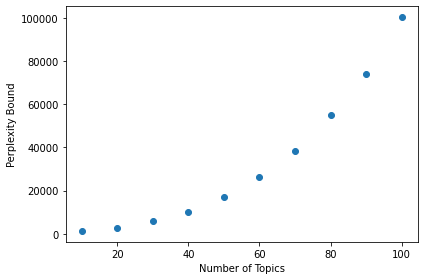

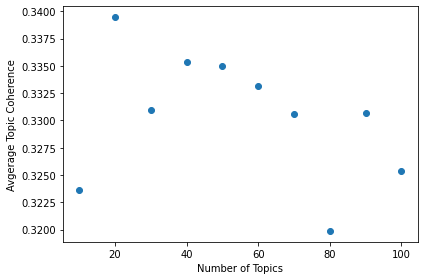

In [3]:
# run model for each topic size
topics_try = [10,20,30,40,50,60,70,80,90,100]
perplexities = []
coherences = []

for k in topics_try:
    print("Trying "+str(k)+" Topics")
    # parameters
    num_topics = k
    chunksize = 5000 # optimal in online learning paper
    alpha = "auto" # prior on topic proportions
    # eta default symmetric
    # decay/offset at defaults 0.5/1 (kappa/tau in online lda paper)

    # load dictionary
    temp = dictionary[0]
    id2word = dictionary.id2token

    # train model
    model = LdaModel(corpus=train_corpus,
                     num_topics=num_topics,
                     id2word=id2word,
                     chunksize=chunksize,
                     alpha=alpha,
                     random_state=271)

    model.save(datapath("authorless_"+str(num_topics)))

    # perplexity on test set
    print("Held Out Perplexity")
    bound = model.log_perplexity(test_corpus)
    print(2**(-bound))
    perplexities.append(2**(-bound))

    # topic coherence
    print("Topic Coherence")
    top_topics = model.top_topics(texts=train_reviews, dictionary=dictionary, coherence="c_v")
    avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
    coherences.append(avg_topic_coherence)
    
plt.figure()
plt.scatter(topics_try, perplexities)
plt.xlabel("Number of Topics")
plt.ylabel("Perplexity Bound")
plt.tight_layout()
plt.savefig("Authorless_Perplexities.png")

plt.figure()
plt.scatter(topics_try, coherences)
plt.xlabel("Number of Topics")
plt.ylabel("Avgerage Topic Coherence")
plt.tight_layout()
plt.savefig("Authorless_Coherences.png")